<a href="https://colab.research.google.com/github/hongsamhc2/Project/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EC%A3%BC%EC%9C%A0%EC%86%8C/Seoul_gasStation_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
glob('/content/drive/MyDrive/datasets/gasstation/지역*.xls')

['/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (21).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (14).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (8).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (7).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (6).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (10).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (16).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (4).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (19).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (22).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (12).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (15).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (

In [3]:
stations = glob('/content/drive/MyDrive/datasets/gasstation/지역*.xls')
stations

['/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (21).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (14).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (8).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (7).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (6).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (10).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (16).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (4).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (19).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (22).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (12).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (15).xls',
 '/content/drive/MyDrive/datasets/gasstation/지역_위치별(주유소) (

In [4]:
tmp_list = []
for file in stations:
  tmp = pd.read_excel(file,header=2)
  tmp_list.append(tmp)

station_con = pd.concat(tmp_list)

In [5]:
station_con

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,수색뉴타운,서울특별시 은평구 수색로 350 (수색동),GS칼텍스,02-309-5051,Y,-,1505,1305,-
1,서울특별시,타이거주유소,서울 은평구 수색로 188 (증산동),SK에너지,02-309-9145,N,-,1519,1319,1000
2,서울특별시,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),현대오일뱅크,02-374-8770,Y,-,1519,1319,-
3,서울특별시,다회주유소,서울 은평구 증산로 441 (신사동),S-OIL,02-375-5156,Y,-,1524,1324,-
4,서울특별시,신사제일주유소,서울특별시 은평구 증산로 423 (신사동),GS칼텍스,02-308-4333,N,1760,1524,1324,1000
...,...,...,...,...,...,...,...,...,...,...
14,서울특별시,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),SK에너지,02-487-2030,Y,1889,1733,1533,1157
15,서울특별시,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),SK에너지,02-473-1981,N,-,1763,1563,1006
16,서울특별시,명일주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,N,1914,1764,1574,-
17,서울특별시,강동주유소,서울 강동구 양재대로 1509 (길동),SK에너지,02-477-5101,N,2258,1983,1784,1289


In [6]:
station_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 18
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      537 non-null    object
 1   상호      537 non-null    object
 2   주소      537 non-null    object
 3   상표      537 non-null    object
 4   전화번호    537 non-null    object
 5   셀프여부    537 non-null    object
 6   고급휘발유   537 non-null    object
 7   휘발유     537 non-null    object
 8   경유      537 non-null    object
 9   실내등유    537 non-null    object
dtypes: object(10)
memory usage: 46.1+ KB


In [7]:
station_result = pd.DataFrame({'GasStation':station_con['상호'],
                               'Address':station_con['주소'],
                               'Price':station_con['휘발유'],
                               'Self':station_con['셀프여부'],
                               'Logo':station_con['상표']})

In [8]:
station_result

,GasStation,Address,Price,Self,Logo
0,수색뉴타운,서울특별시 은평구 수색로 350 (수색동),1505,Y,GS칼텍스
1,타이거주유소,서울 은평구 수색로 188 (증산동),1519,N,SK에너지
2,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1519,Y,현대오일뱅크
3,다회주유소,서울 은평구 증산로 441 (신사동),1524,Y,S-OIL
4,신사제일주유소,서울특별시 은평구 증산로 423 (신사동),1524,N,GS칼텍스
...,...,...,...,...,...
14,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1733,Y,SK에너지
15,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),1763,N,SK에너지
16,명일주유소,서울 강동구 고덕로 168 (명일동),1764,N,SK에너지
17,강동주유소,서울 강동구 양재대로 1509 (길동),1983,N,SK에너지


In [9]:
station_result['state'] = [eachAddress.split()[1] for eachAddress in station_result['Address']]

In [10]:
station_result

,GasStation,Address,Price,Self,Logo,state
0,수색뉴타운,서울특별시 은평구 수색로 350 (수색동),1505,Y,GS칼텍스,은평구
1,타이거주유소,서울 은평구 수색로 188 (증산동),1519,N,SK에너지,은평구
2,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1519,Y,현대오일뱅크,은평구
3,다회주유소,서울 은평구 증산로 441 (신사동),1524,Y,S-OIL,은평구
4,신사제일주유소,서울특별시 은평구 증산로 423 (신사동),1524,N,GS칼텍스,은평구
...,...,...,...,...,...,...
14,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1733,Y,SK에너지,강동구
15,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),1763,N,SK에너지,강동구
16,명일주유소,서울 강동구 고덕로 168 (명일동),1764,N,SK에너지,강동구
17,강동주유소,서울 강동구 양재대로 1509 (길동),1983,N,SK에너지,강동구


In [11]:
station_result['state'].unique()

array(['은평구', '서초구', '노원구', '금천구', '구로구', '동대문구', '성북구', '관악구', '영등포구',
       '종로구', '마포구', '성동구', '서울특별시', '중구', '강남구', '양천구', '강서구', '송파구',
       '중랑구', '용산구', '서대문구', '강북구', '광진구', '동작구', '도봉구', '특별시', '강동구'],
      dtype=object)

In [12]:
station_result[station_result['state']=='서울특별시']

,GasStation,Address,Price,Self,Logo,state
12,SK네트웍스(주)효진주유소,1 서울특별시 성동구 동일로 129 (성수동2가),1654,N,SK에너지,서울특별시


In [13]:
station_result.loc[station_result['state']=='서울특별시','state'] = '성동구'

In [14]:
station_result['state'].unique()

array(['은평구', '서초구', '노원구', '금천구', '구로구', '동대문구', '성북구', '관악구', '영등포구',
       '종로구', '마포구', '성동구', '중구', '강남구', '양천구', '강서구', '송파구', '중랑구',
       '용산구', '서대문구', '강북구', '광진구', '동작구', '도봉구', '특별시', '강동구'],
      dtype=object)

In [15]:
station_result.loc[station_result['state']=='특별시','state'] = '도봉구'
station_result['state'].unique()

array(['은평구', '서초구', '노원구', '금천구', '구로구', '동대문구', '성북구', '관악구', '영등포구',
       '종로구', '마포구', '성동구', '중구', '강남구', '양천구', '강서구', '송파구', '중랑구',
       '용산구', '서대문구', '강북구', '광진구', '동작구', '도봉구', '강동구'], dtype=object)

In [16]:
station_result[station_result['Price']=='-']

,GasStation,Address,Price,Self,Logo,state
33,하나주유소,서울특별시 영등포구 도림로 236 (신길동),-,N,S-OIL,영등포구
12,(주)에이앤이청담주유소,서울특별시 강북구 도봉로 155 (미아동),-,Y,SK에너지,강북구
13,송정주유소,서울특별시 강북구 인수봉로 185 (수유동),-,N,자가상표,강북구
18,명진석유(주)동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),-,Y,GS칼텍스,강동구


In [17]:
station_result = station_result[station_result['Price']!='-']

In [18]:
station_result

,GasStation,Address,Price,Self,Logo,state
0,수색뉴타운,서울특별시 은평구 수색로 350 (수색동),1505,Y,GS칼텍스,은평구
1,타이거주유소,서울 은평구 수색로 188 (증산동),1519,N,SK에너지,은평구
2,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1519,Y,현대오일뱅크,은평구
3,다회주유소,서울 은평구 증산로 441 (신사동),1524,Y,S-OIL,은평구
4,신사제일주유소,서울특별시 은평구 증산로 423 (신사동),1524,N,GS칼텍스,은평구
...,...,...,...,...,...,...
13,SK네트윅스(주)길동주유소,서울 강동구 천호대로 1221 (길동),1733,Y,SK에너지,강동구
14,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1733,Y,SK에너지,강동구
15,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),1763,N,SK에너지,강동구
16,명일주유소,서울 강동구 고덕로 168 (명일동),1764,N,SK에너지,강동구


In [19]:
station_result.loc[:,'Price'] = station_result.loc[:,'Price'].astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [20]:
station_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 17
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GasStation  533 non-null    object 
 1   Address     533 non-null    object 
 2   Price       533 non-null    float64
 3   Self        533 non-null    object 
 4   Logo        533 non-null    object 
 5   state       533 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [21]:
station_result.reset_index(inplace=True)
del station_result['index']

In [22]:
station_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GasStation  533 non-null    object 
 1   Address     533 non-null    object 
 2   Price       533 non-null    float64
 3   Self        533 non-null    object 
 4   Logo        533 non-null    object 
 5   state       533 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.1+ KB


In [23]:
station_result.head(10)

,GasStation,Address,Price,Self,Logo,state
0,수색뉴타운,서울특별시 은평구 수색로 350 (수색동),1505.0,Y,GS칼텍스,은평구
1,타이거주유소,서울 은평구 수색로 188 (증산동),1519.0,N,SK에너지,은평구
2,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1519.0,Y,현대오일뱅크,은평구
3,다회주유소,서울 은평구 증산로 441 (신사동),1524.0,Y,S-OIL,은평구
4,신사제일주유소,서울특별시 은평구 증산로 423 (신사동),1524.0,N,GS칼텍스,은평구
5,뉴타운셀프주유소,서울특별시 은평구 통일로 1031,1529.0,Y,S-OIL,은평구
6,서부주유소,서울특별시 은평구 응암로 210 (응암동),1533.0,Y,GS칼텍스,은평구
7,(주)에스지주유소,서울 은평구 증산로 371 (신사동),1534.0,N,현대오일뱅크,은평구
8,불광주유소,서울 은평구 연서로 314 (불광동),1534.0,N,현대오일뱅크,은평구
9,무궁화주유소,서울 은평구 응암로 163 (응암동),1534.0,N,SK에너지,은평구


In [24]:
# !apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


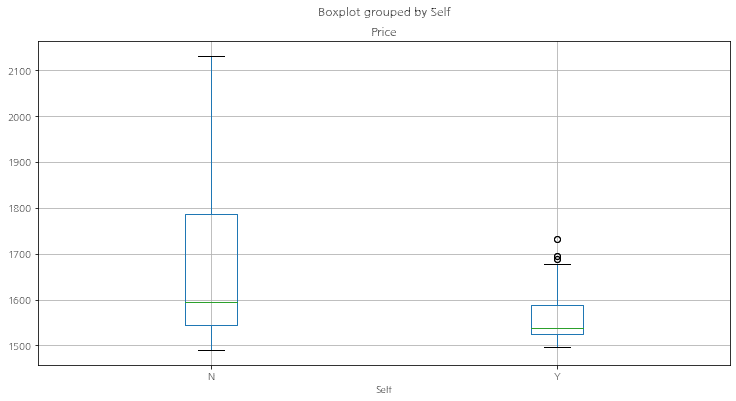

In [25]:
station_result.boxplot(column='Price',by='Self',figsize=(12,6))

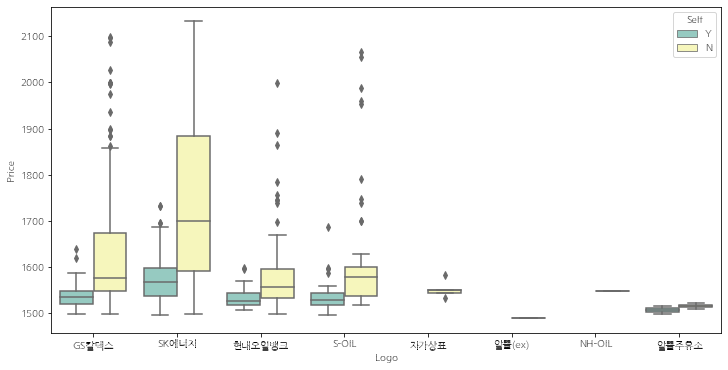

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Logo',y='Price',hue='Self',data=station_result,palette='Set3')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


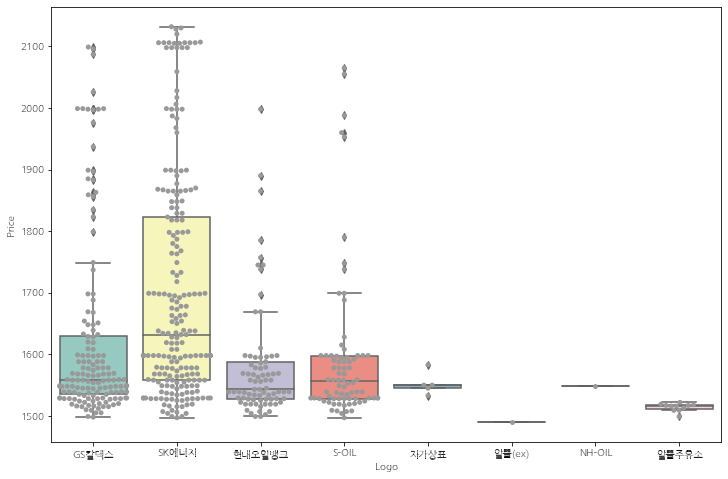

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Logo", y="Price", data=station_result, palette="Set3")
sns.swarmplot(x="Logo", y="Price", data=station_result, color=".6")


In [28]:
# !pip install googlemaps

In [29]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [30]:
station_result.sort_values(by='Price', ascending=False).head(10)


,GasStation,Address,Price,Self,Logo,state
261,서남주유소,서울 중구 통일로 30 (봉래동1가),2132.0,N,SK에너지,중구
260,장충주유소,서울 중구 장충단로 202 (장충동1가),2130.0,N,SK에너지,중구
60,양재주유소,서울 서초구 바우뫼로 178 (양재동),2128.0,N,SK에너지,서초구
307,뉴서울(강남),서울 강남구 언주로 716 (논현동),2120.0,N,SK에너지,강남구
306,오천주유소,서울 강남구 봉은사로 503 (삼성동),2107.0,N,SK에너지,강남구
434,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),2106.0,N,SK에너지,용산구
217,재동주유소,서울특별시 종로구 율곡로 58 (경운동),2106.0,N,SK에너지,종로구
259,통일주유소,서울 중구 동호로 296 (장충동2가),2106.0,N,SK에너지,중구
305,삼성주유소,서울 강남구 삼성로 521 (삼성동),2106.0,N,SK에너지,강남구
435,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),2106.0,N,SK에너지,용산구


In [31]:
import numpy as np
state_data = pd.pivot_table(station_result, index=["state"], values=["Price"],
 aggfunc=np.mean)
state_data.head()

,Price
state,
강남구,1791.000000
강동구,1656.722222
강북구,1534.333333
강서구,1576.428571
관악구,1603.055556


In [32]:
# ****************

gkey = "************************"
gmaps = googlemaps.Client(key=gkey)

In [33]:
lat =[]
lng = []
for n in station_result.index:

  tmp = str(station_result['Address'][n]).split('(')[0]
  tmp_map = gmaps.geocode(tmp)
  tmp_loc = tmp_map[0].get('geometry')
  lat.append(tmp_loc['location']['lat'])
  lng.append(tmp_loc['location']['lng'])


In [34]:
station_result['lat'] = lat
station_result['lng'] = lng
station_result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GasStation,Address,Price,Self,Logo,state,lat,lng
0,수색뉴타운,서울특별시 은평구 수색로 350 (수색동),1505.0,Y,GS칼텍스,은평구,37.587107,126.887542
1,타이거주유소,서울 은평구 수색로 188 (증산동),1519.0,N,SK에너지,은평구,37.578424,126.902050
2,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1519.0,Y,현대오일뱅크,은평구,37.581122,126.897774
3,다회주유소,서울 은평구 증산로 441 (신사동),1524.0,Y,S-OIL,은평구,37.595592,126.914451
4,신사제일주유소,서울특별시 은평구 증산로 423 (신사동),1524.0,N,GS칼텍스,은평구,37.594051,126.913921
...,...,...,...,...,...,...,...,...
528,SK네트윅스(주)길동주유소,서울 강동구 천호대로 1221 (길동),1733.0,Y,SK에너지,강동구,37.536095,127.146326
529,고속셀프주유소,서울특별시 강동구 천호대로 1246 (둔촌동),1733.0,Y,SK에너지,강동구,37.536464,127.149316
530,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),1763.0,N,SK에너지,강동구,37.529139,127.123792
531,명일주유소,서울 강동구 고덕로 168 (명일동),1764.0,N,SK에너지,강동구,37.554452,127.143956


In [35]:
oil_price_top10 = station_result.sort_values(by='Price', ascending=False).head(10)
oil_price_top10

,GasStation,Address,Price,Self,Logo,state,lat,lng
261,서남주유소,서울 중구 통일로 30 (봉래동1가),2132.0,N,SK에너지,중구,37.558348,126.972090
260,장충주유소,서울 중구 장충단로 202 (장충동1가),2130.0,N,SK에너지,중구,37.562719,127.007010
60,양재주유소,서울 서초구 바우뫼로 178 (양재동),2128.0,N,SK에너지,서초구,37.478071,127.039610
307,뉴서울(강남),서울 강남구 언주로 716 (논현동),2120.0,N,SK에너지,강남구,37.517636,127.035756
306,오천주유소,서울 강남구 봉은사로 503 (삼성동),2107.0,N,SK에너지,강남구,37.513458,127.053786
434,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),2106.0,N,SK에너지,용산구,37.546955,126.972218
217,재동주유소,서울특별시 종로구 율곡로 58 (경운동),2106.0,N,SK에너지,종로구,37.576388,126.985851
259,통일주유소,서울 중구 동호로 296 (장충동2가),2106.0,N,SK에너지,중구,37.560714,127.003177
305,삼성주유소,서울 강남구 삼성로 521 (삼성동),2106.0,N,SK에너지,강남구,37.508507,127.055165
435,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),2106.0,N,SK에너지,용산구,37.547451,126.969904


In [36]:
oil_price_bot10 = station_result.sort_values(by='Price', ascending=True).head(10)
oil_price_bot10

,GasStation,Address,Price,Self,Logo,state,lat,lng
19,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1490.0,N,알뜰(ex),서초구,37.459906,127.042060
334,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1497.0,Y,SK에너지,강서구,37.555284,126.768567
61,태릉솔밭주유소,서울특별시 노원구 노원로 49 (공릉동),1497.0,Y,S-OIL,노원구,37.625918,127.085533
453,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1498.0,Y,GS칼텍스,강북구,37.642140,127.029568
402,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1499.0,Y,SK에너지,중랑구,37.590907,127.093834
178,(주)강서오일,서울 영등포구 도신로 151 (도림동),1499.0,N,현대오일뱅크,영등포구,37.509969,126.908231
177,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1499.0,N,GS칼텍스,영등포구,37.498556,126.895791
176,도림주유소,서울 영등포구 도림로 343 (도림동),1499.0,Y,알뜰주유소,영등포구,37.507656,126.900191
483,서경주유소,서울 동작구 대림로 46 (신대방동),1499.0,N,현대오일뱅크,동작구,37.487947,126.908240
91,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1499.0,N,SK에너지,구로구,37.491009,126.826675


In [37]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)


In [38]:
for n in oil_price_top10.index:
  if pd.notnull(oil_price_top10['lat'][n]):
    folium.CircleMarker([oil_price_top10['lat'][n],oil_price_top10['lng'][n]],
                        radius=15,color='#CD3181',
                        fill_color='#CD3181',
                        foll=True).add_to(map)

for n in oil_price_bot10.index:
  if pd.notnull(oil_price_bot10['lat'][n]):
    folium.CircleMarker([oil_price_bot10['lat'][n],oil_price_bot10['lng'][n]],
                        radius=15,color='#3186cc',
                        fill_color='#3186cc',
                        foll=True).add_to(map)

In [39]:
map